<a href="https://colab.research.google.com/github/Mickhelgoh/BrainTumor/blob/main/1Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

scraping data

In [ ]:
!pip install  -q kaggle
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jenyangreyanitif2022","key":"a7d78be444c9b686949fcfcff9909e86"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d 'sartajbhuvaji/brain-tumor-classification-mri'

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 97% 84.0M/86.8M [00:00<00:00, 196MB/s]
100% 86.8M/86.8M [00:00<00:00, 180MB/s]


In [ ]:
import zipfile,os,shutil

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
filezip = '/content/brain-tumor-classification-mri.zip'
extraczip = zipfile.ZipFile(filezip,'r')
extraczip.extractall('dataset')

In [ ]:
os.listdir("/content/dataset")

['Training', 'Testing']

In [ ]:
for dirname, _, filenames in os.walk('/content/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/dataset/Training/glioma_tumor/gg (760).jpg
/content/dataset/Training/glioma_tumor/gg (135).jpg
/content/dataset/Training/glioma_tumor/gg (250).jpg
/content/dataset/Training/glioma_tumor/gg (531).jpg
/content/dataset/Training/glioma_tumor/gg (504).jpg
/content/dataset/Training/glioma_tumor/gg (544).jpg
/content/dataset/Training/glioma_tumor/gg (775).jpg
/content/dataset/Training/glioma_tumor/gg (395).jpg
/content/dataset/Training/glioma_tumor/gg (778).jpg
/content/dataset/Training/glioma_tumor/gg (673).jpg
/content/dataset/Training/glioma_tumor/gg (549).jpg
/content/dataset/Training/glioma_tumor/gg (348).jpg
/content/dataset/Training/glioma_tumor/gg (262).jpg
/content/dataset/Training/glioma_tumor/gg (218).jpg
/content/dataset/Training/glioma_tumor/gg (483).jpg
/content/dataset/Training/glioma_tumor/gg (693).jpg
/content/dataset/Training/glioma_tumor/gg (400).jpg
/content/dataset/Training/glioma_tumor/gg (810).jpg
/content/dataset/Training/glioma_tumor/gg (771).jpg
/content/dat

VGG16 dan efficientnet

100%|██████████| 74/74 [00:00<00:00, 369.15it/s]


Epoch 1/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.5039 - loss: 14.3671
Epoch 1: val_accuracy improved from -inf to 0.72171, saving model to model_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 132s 702ms/step - accuracy: 0.5052 - loss: 14.3340 - val_accuracy: 0.7217 - val_loss: 8.7010 - learning_rate: 0.0010
Epoch 2/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7971 - loss: 6.5368
Epoch 2: val_accuracy improved from 0.72171 to 0.93578, saving model to model_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.7974 - loss: 6.5307 - val_accuracy: 0.9358 - val_loss: 4.7065 - learning_rate: 0.0010
Epoch 3/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8783 - loss: 4.6015
Epoch 3: val_accuracy improved from 0.93578 to 0.94801, saving model to model_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - accuracy: 0.8784 - loss: 4.5979 - val_accuracy: 0.9480 - val_loss: 3.4714 - learning_rate: 0.0010
Epoch 4/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/st

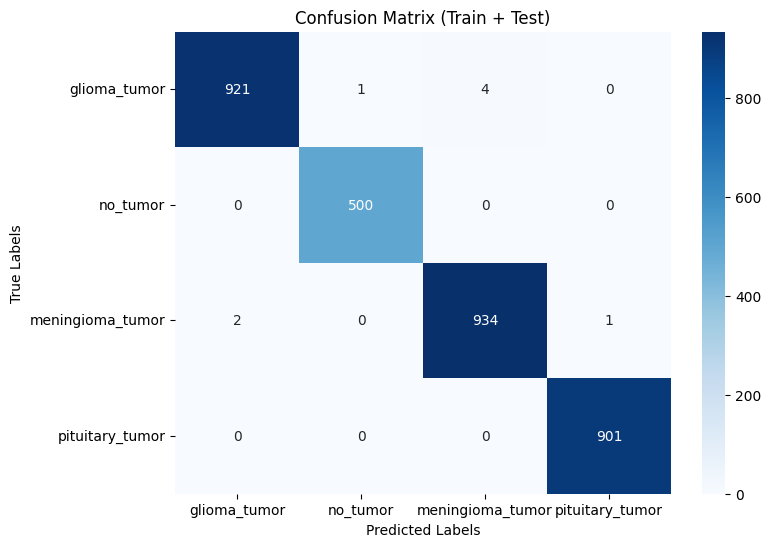

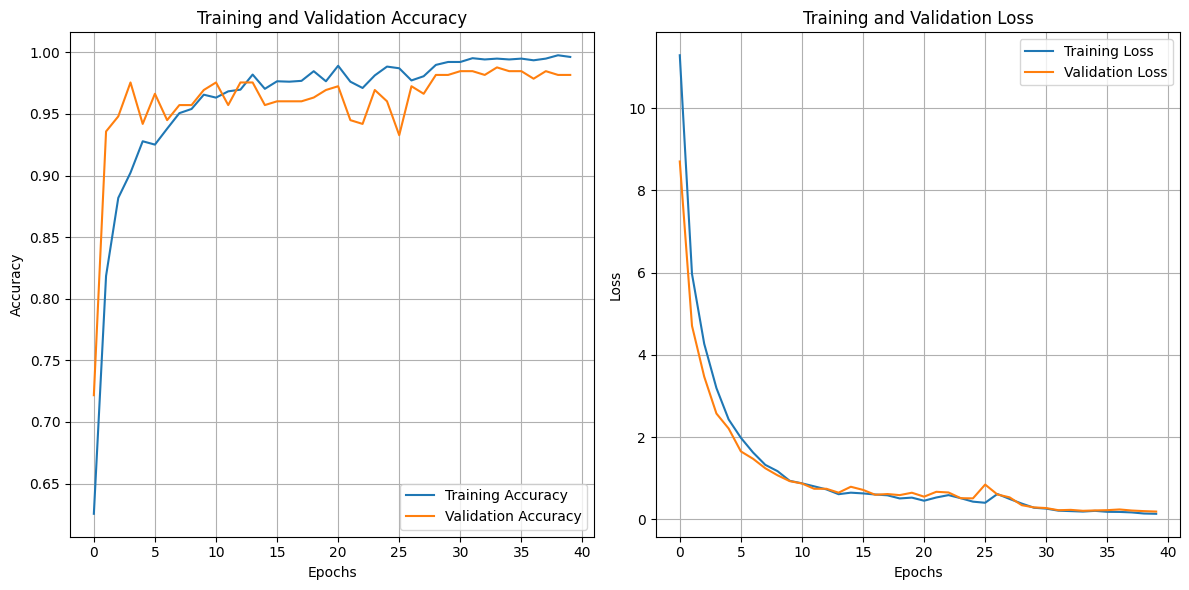

In [ ]:
# Import libraries
from tensorflow.keras.applications import VGG16, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load VGG16 and MobileNet base models without top layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


# Fine-tune some layers of both models (Gradual Unfreezing)
# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in vgg16.layers[:100]:
    layer.trainable = False

for layer in efficientnet.layers[:100]:
    layer.trainable = False


# Extract features from both models
vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

efficientnet_out = GlobalAveragePooling2D()(efficientnet.output)
efficientnet_out = Dropout(rate=0.5)(efficientnet_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([vgg_out, efficientnet_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model = Model(inputs=[vgg16.input, efficientnet.input], outputs=output_layer)


# Compile the model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history = model.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=40,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)

# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


1. VGG16

100%|██████████| 74/74 [00:00<00:00, 189.17it/s]


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.4198 - loss: 11.2568
Epoch 1: val_accuracy improved from -inf to 0.75229, saving model to model_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.4206 - loss: 11.2434 - val_accuracy: 0.7523 - val_loss: 7.5716 - learning_rate: 0.0010
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5838 - loss: 7.6736
Epoch 2: val_accuracy improved from 0.75229 to 0.77676, saving model to model_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.5838 - loss: 7.6697 - val_accuracy: 0.7768 - val_loss: 5.9186 - learning_rate: 0.0010
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6104 - loss: 6.1805
Epoch 3: val_accuracy improved from 0.77676 to 0.78899, saving model to model_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.6104 - loss: 6.1775 - val_accuracy: 0.7890 - val_loss: 4.8374 - learning_rate: 0.0010
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - acc

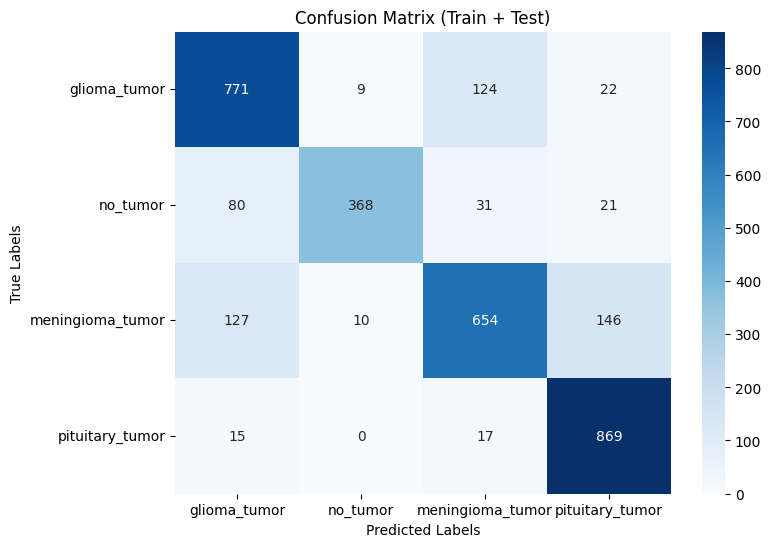

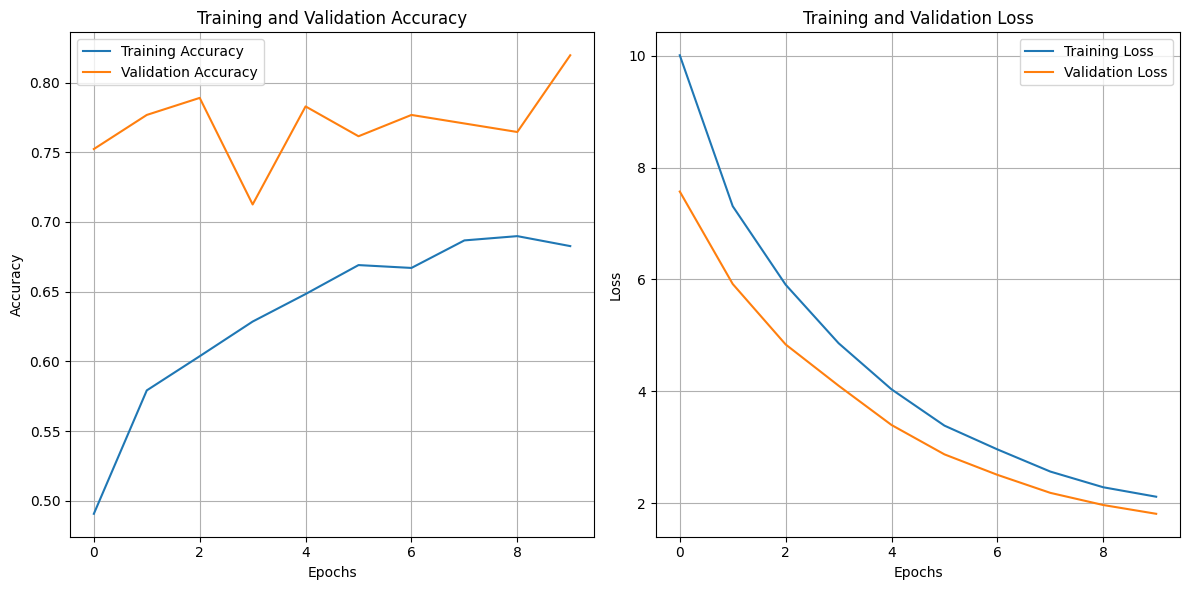

In [ ]:
# Import libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load VGG16 base model without top layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of the VGG16 model (Gradual Unfreezing)
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from VGG16
vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Add Dense layers after VGG16 output with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(vgg_out)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model using VGG16
model = Model(inputs=vgg16.input, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model.predict(X_train)
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)

# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


2. mobile net

100%|██████████| 74/74 [00:00<00:00, 244.56it/s]
<ipython-input-19-5d87bd4e3dd3>:67: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3780 - loss: 13.4532
Epoch 1: val_accuracy improved from -inf to 0.66972, saving model to model_best_mobilenet.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.3788 - loss: 13.4340 - val_accuracy: 0.6697 - val_loss: 8.7414 - learning_rate: 0.0010
Epoch 2/10
89/92 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5391 - loss: 8.8151
Epoch 2: val_accuracy improved from 0.66972 to 0.70642, saving model to model_best_mobilenet.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.5397 - loss: 8.7905 - val_accuracy: 0.7064 - val_loss: 6.7508 - learning_rate: 0.0010
Epoch 3/10
90/92 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5752 - loss: 6.8274
Epoch 3: val_accuracy improved from 0.70642 to 0.73394, saving model to model_best_mobilenet.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5751 - loss: 6.8165 - val_accuracy: 0.7339 - val_loss: 5.4393 - learning_rate: 0.0010
Epoch 4/10
91/92 ━━━━━━━━━━

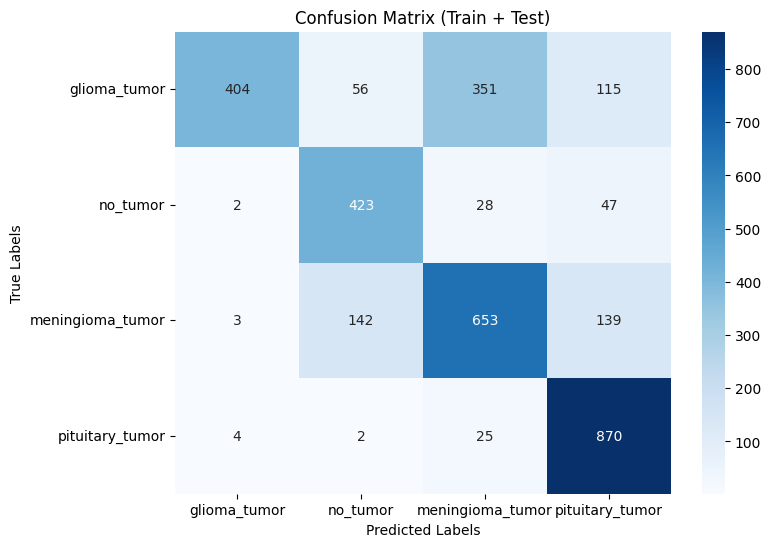

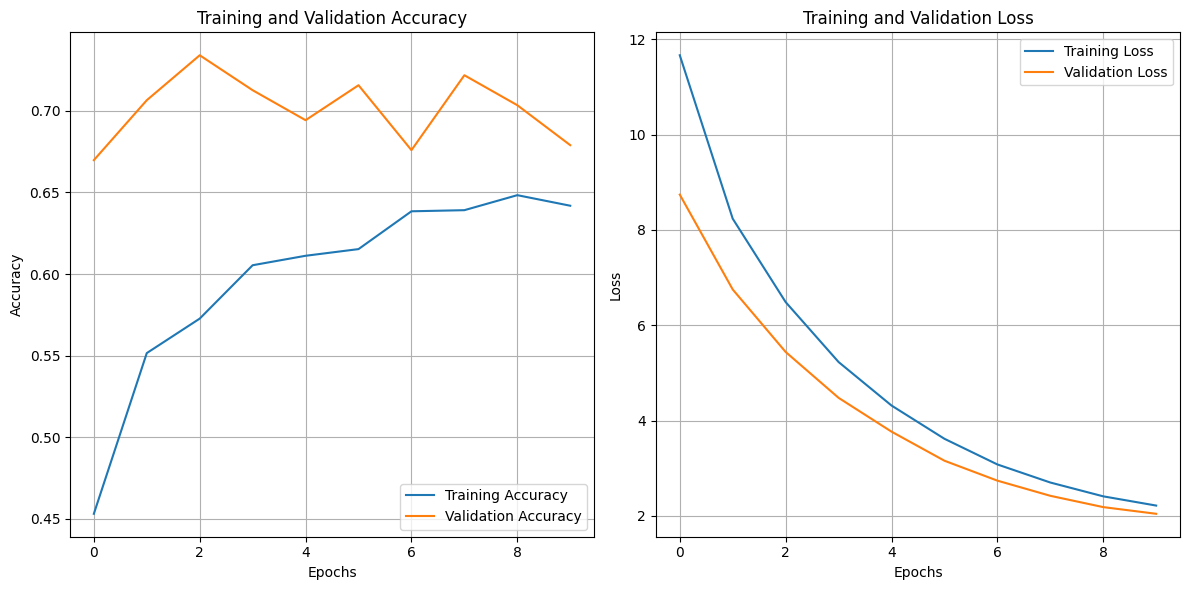

In [ ]:
# Import libraries
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load MobileNet base model without top layers
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of the MobileNet model (Gradual Unfreezing)
for layer in mobilenet.layers[:100]:
    layer.trainable = False

# Extract features from MobileNet
mobilenet_out = GlobalAveragePooling2D()(mobilenet.output)
mobilenet_out = Dropout(rate=0.5)(mobilenet_out)  # Increase dropout

# Add Dense layers after MobileNet output with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(mobilenet_out)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model using MobileNet
model = Model(inputs=mobilenet.input, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model_best_mobilenet.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model.predict(X_train)
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)

# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


3. resnet50

100%|██████████| 74/74 [00:00<00:00, 245.77it/s]


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.5874 - loss: 17.4567
Epoch 1: val_accuracy improved from -inf to 0.76147, saving model to model_best_resnet50.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 324ms/step - accuracy: 0.5886 - loss: 17.4357 - val_accuracy: 0.7615 - val_loss: 15.1950 - learning_rate: 0.0010
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8304 - loss: 10.1818
Epoch 2: val_accuracy improved from 0.76147 to 0.88685, saving model to model_best_resnet50.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 162ms/step - accuracy: 0.8306 - loss: 10.1679 - val_accuracy: 0.8869 - val_loss: 6.7363 - learning_rate: 0.0010
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8976 - loss: 5.5953
Epoch 3: val_accuracy improved from 0.88685 to 0.90214, saving model to model_best_resnet50.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.8976 - loss: 5.5879 - val_accuracy: 0.9021 - val_loss: 3.6754 - learning_rate: 0.0010
Epoch 4/10
92/92 ━━━━━

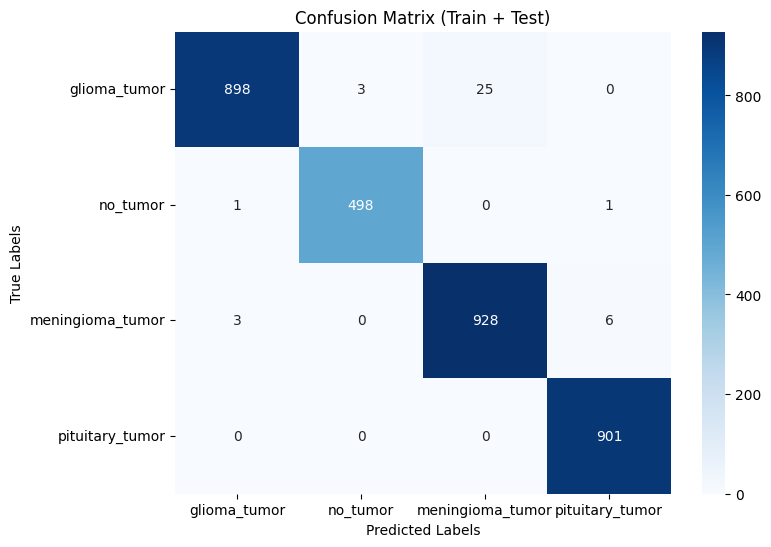

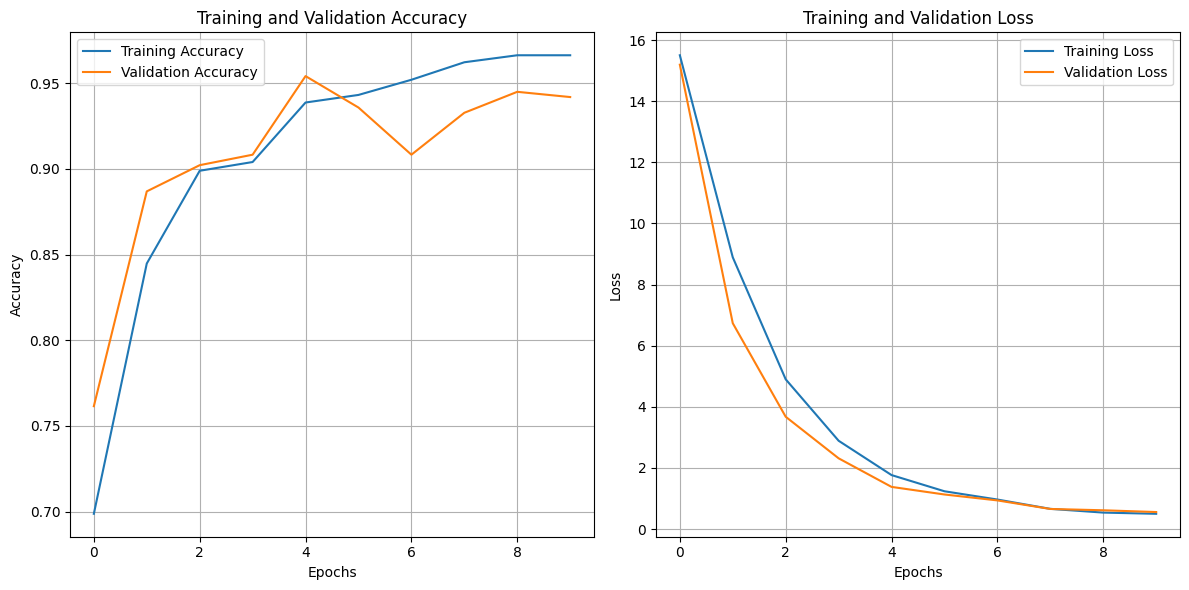

In [ ]:
# Import libraries
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load ResNet50 base model without top layers
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of the ResNet50 model (Gradual Unfreezing)
for layer in resnet50.layers[:140]:
    layer.trainable = False

# Extract features from ResNet50
resnet50_out = GlobalAveragePooling2D()(resnet50.output)
resnet50_out = Dropout(rate=0.5)(resnet50_out)  # Increase dropout

# Add Dense layers after ResNet50 output with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(resnet50_out)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model using ResNet50
model = Model(inputs=resnet50.input, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model_best_resnet50.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model.predict(X_train)
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)

# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


4. densenet121

100%|██████████| 74/74 [00:00<00:00, 179.78it/s]


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.4682 - loss: 12.8118
Epoch 1: val_accuracy improved from -inf to 0.50153, saving model to model_best_densenet121.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 112s 589ms/step - accuracy: 0.4695 - loss: 12.7911 - val_accuracy: 0.5015 - val_loss: 13.1558 - learning_rate: 0.0010
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7388 - loss: 8.0730
Epoch 2: val_accuracy improved from 0.50153 to 0.83792, saving model to model_best_densenet121.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.7391 - loss: 8.0670 - val_accuracy: 0.8379 - val_loss: 6.3988 - learning_rate: 0.0010
Epoch 3/10
91/92 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8272 - loss: 6.0394
Epoch 3: val_accuracy improved from 0.83792 to 0.88073, saving model to model_best_densenet121.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.8274 - loss: 6.0300 - val_accuracy: 0.8807 - val_loss: 4.7714 - learning_rate: 0.0010
Epoch 4/10
91/92 

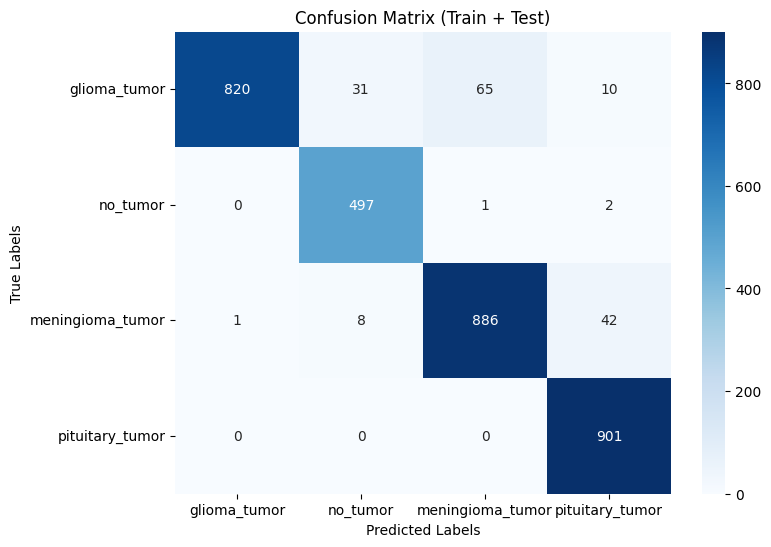

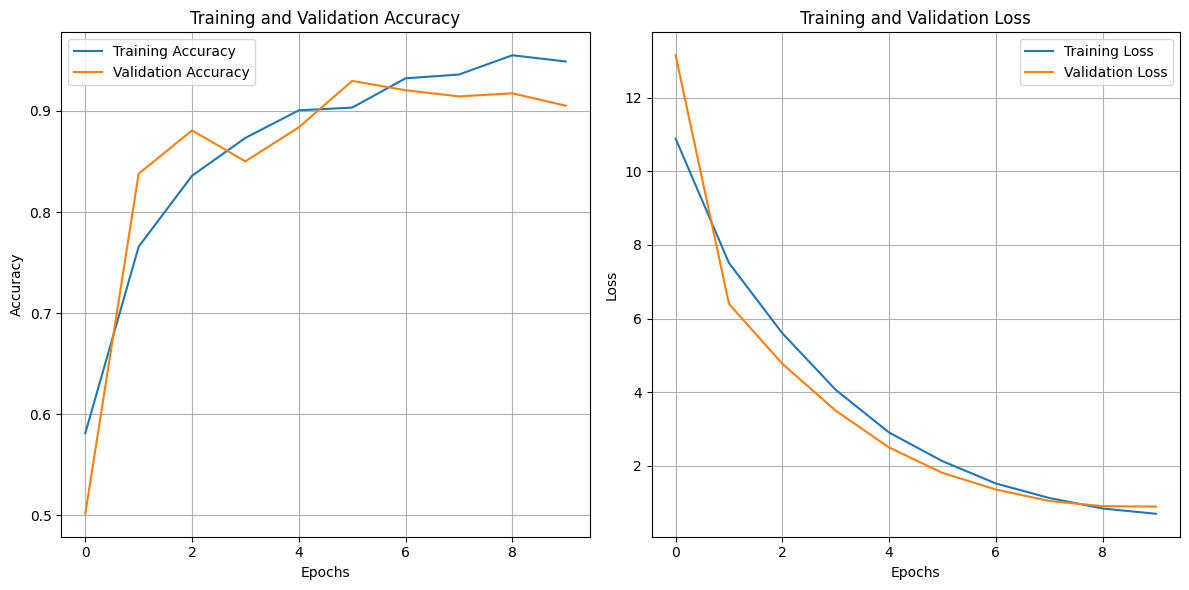

In [ ]:
# Import libraries
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 base model without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of the DenseNet121 model (Gradual Unfreezing)
for layer in densenet121.layers[:300]:
    layer.trainable = False

# Extract features from DenseNet121
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

# Add Dense layers after DenseNet121 output with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(densenet_out)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model using DenseNet121
model = Model(inputs=densenet121.input, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model_best_densenet121.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model.predict(X_train)
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)

# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


5. efficientnetBO

100%|██████████| 74/74 [00:00<00:00, 347.75it/s]


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.5521 - loss: 16.0926
Epoch 1: val_accuracy improved from -inf to 0.83180, saving model to model_best_efficientnet.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 65s 373ms/step - accuracy: 0.5533 - loss: 16.0787 - val_accuracy: 0.8318 - val_loss: 12.0712 - learning_rate: 0.0010
Epoch 2/10
91/92 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8069 - loss: 11.1903
Epoch 2: val_accuracy improved from 0.83180 to 0.87156, saving model to model_best_efficientnet.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.8070 - loss: 11.1680 - val_accuracy: 0.8716 - val_loss: 8.0992 - learning_rate: 0.0010
Epoch 3/10
91/92 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8547 - loss: 7.3410
Epoch 3: val_accuracy improved from 0.87156 to 0.87462, saving model to model_best_efficientnet.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8549 - loss: 7.3250 - val_accuracy: 0.8746 - val_loss: 5.1906 - learning_rate: 0.0010
Epoch 4/10
91

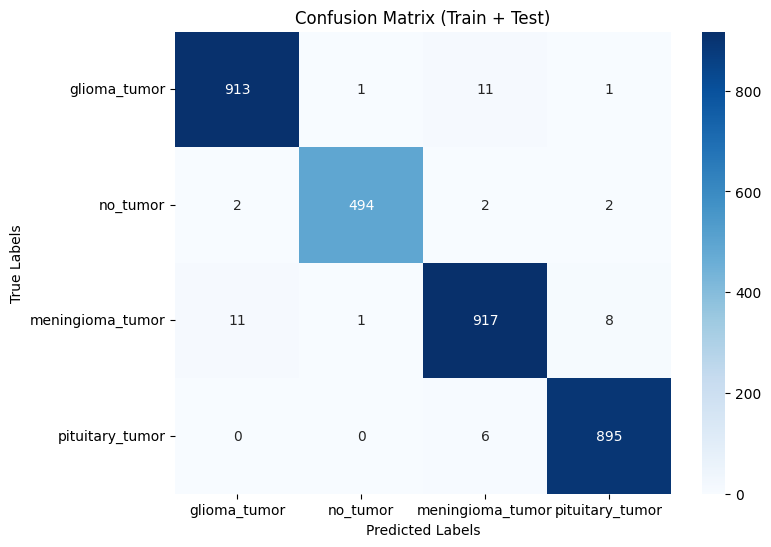

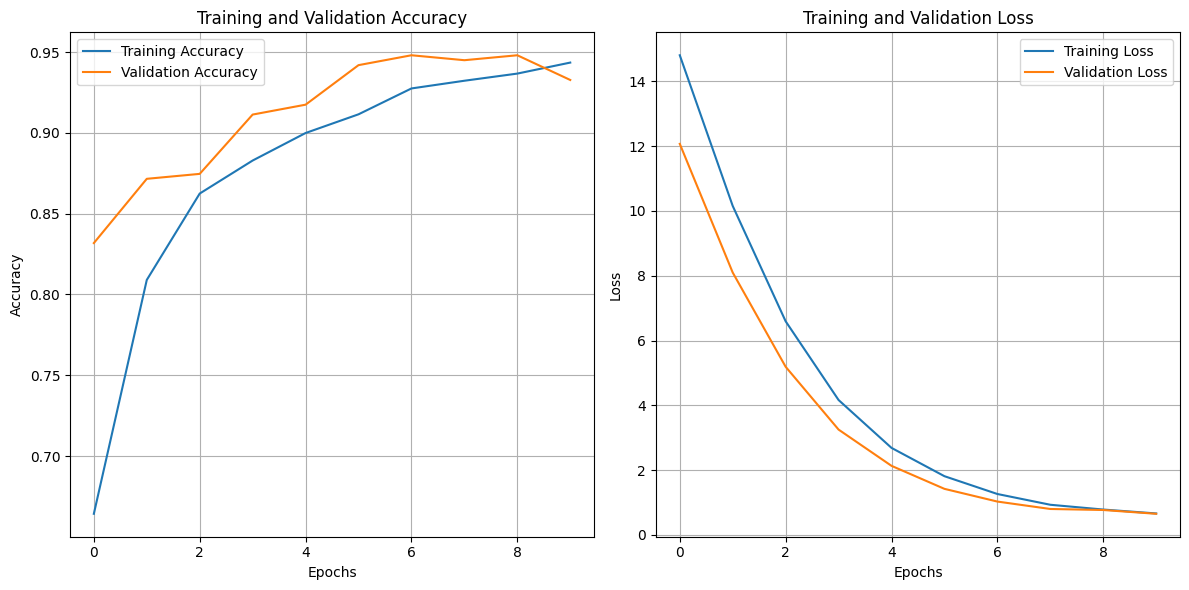

In [ ]:
# Import libraries
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load EfficientNetB0 base model without top layers
efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of the EfficientNetB0 model (Gradual Unfreezing)
for layer in efficientnet.layers[:200]:
    layer.trainable = False

# Extract features from EfficientNetB0
efficientnet_out = GlobalAveragePooling2D()(efficientnet.output)
efficientnet_out = Dropout(rate=0.5)(efficientnet_out)  # Increase dropout

# Add Dense layers after EfficientNetB0 output with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(efficientnet_out)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model using EfficientNetB0
model = Model(inputs=efficientnet.input, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model_best_efficientnet.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model.predict(X_train)
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)

# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


eposh adam 30

100%|██████████| 74/74 [00:00<00:00, 362.04it/s]


Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.4448 - loss: 13.9638
Epoch 1: val_accuracy improved from -inf to 0.65138, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.4459 - loss: 13.9380 - val_accuracy: 0.6514 - val_loss: 8.8667 - learning_rate: 0.0010
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.7125 - loss: 7.8240
Epoch 2: val_accuracy did not improve from 0.65138
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 178ms/step - accuracy: 0.7129 - loss: 7.8170 - val_accuracy: 0.5107 - val_loss: 7.8153 - learning_rate: 0.0010
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.7962 - loss: 5.4749
Epoch 3: val_accuracy improved from 0.65138 to 0.90214, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - accuracy: 0.7964 - loss: 5.4703 - val_accuracy: 0.9021 - val_loss: 4.0710 - learning_rate: 0.0010
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8708 - loss: 3.9257
Ep

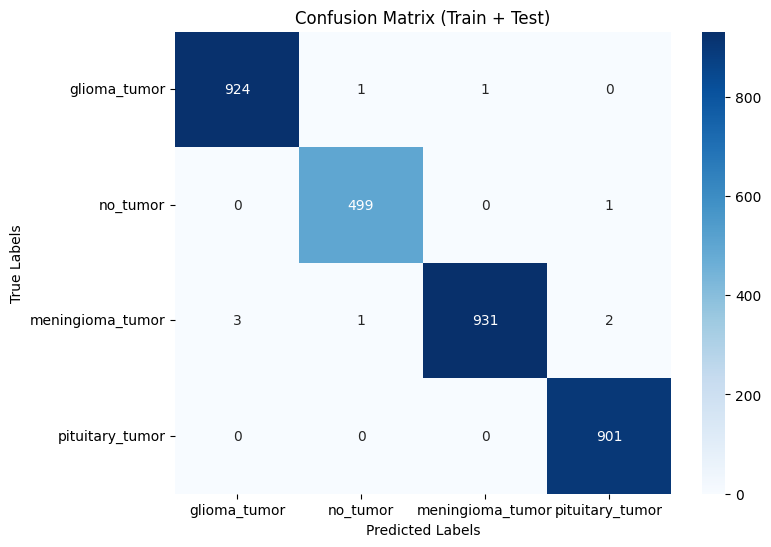

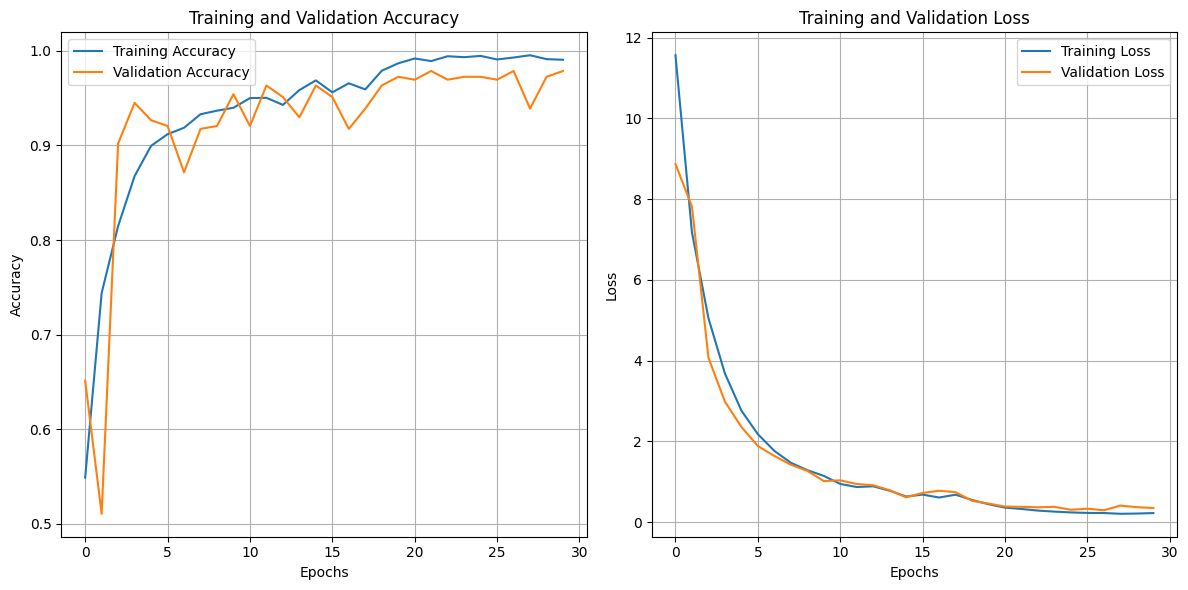

In [ ]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()